<a href="https://colab.research.google.com/github/Alwin1847207/ML-KNN-StudentMarks/blob/main/ML_CIA3_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [289]:
# Importing the required packages
import pandas as pd
import numpy as np

In [290]:
# List and verify is the dataset is uploaded
!ls

 sample_data  'Student Marks - Master.csv'


In [291]:
# reading the dataset
data=pd.read_csv('Student Marks - Master.csv')

In [292]:
# Videwing the dataset
data.head(10)

,10th,12th,UG,PG,outcome
0,77.90,58.33,62.47,54.42,50-55
1,92.60,76.00,61.29,54.50,50-55
2,75.60,50.92,57.50,51.88,50-55
3,73.42,64.60,53.00,58.65,50-55
4,64.60,71.60,67.11,53.00,50-55
5,68.40,76.00,69.40,53.75,50-55
6,88.20,79.00,53.00,67.25,50-55
7,91.40,92.20,51.38,72.77,50-55
8,72.20,60.80,81.17,59.71,55-60
9,56.50,69.83,67.88,61.29,55-60


In [293]:
# viewing the types of data
data.dtypes

10th       float64
12th       float64
UG         float64
PG         float64
outcome     object
dtype: object

In [294]:
# dataframe info
data.info

<bound method DataFrame.info of       10th   12th     UG    PG  outcome
0    77.90  58.33  62.47  54.42   50-55
1    92.60  76.00  61.29  54.50   50-55
2    75.60  50.92  57.50  51.88   50-55
3    73.42  64.60  53.00  58.65   50-55
4    64.60  71.60  67.11  53.00   50-55
..     ...    ...    ...    ...     ...
995  81.67  67.00  84.86  76.88   65-70
996  78.67  74.43  65.47  80.25   65-70
997  91.81  71.33  74.50  67.80   65-70
998  83.60  73.40  70.44  67.88   65-70
999  65.20  69.75  68.50  65.00   65-70

[1000 rows x 5 columns]>

In [295]:
# summarry on the dataset
data.describe()

,10th,12th,UG,PG
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81.543610,75.589870,72.711070,68.539780
std,9.640974,10.434805,9.641243,7.279318
min,56.500000,50.920000,43.750000,51.880000
25%,74.330000,67.000000,66.000000,62.650000
50%,83.040000,76.000000,72.910000,68.250000
75%,89.300000,83.600000,79.350000,74.250000
max,100.000000,97.830000,94.000000,87.300000


(array([[  0.,   0.,  24.,  54.,  93., 143., 191., 222., 198.,  75.],
        [  0.,   6.,  60., 150., 192., 165., 176., 117., 119.,  15.],
        [  5.,  18.,  60., 177., 214., 221., 142., 107.,  56.,   0.],
        [  0.,  30.,  84., 310., 236., 216., 114.,  10.,   0.,   0.]]),
 array([ 43.75 ,  49.375,  55.   ,  60.625,  66.25 ,  71.875,  77.5  ,
         83.125,  88.75 ,  94.375, 100.   ]),
 <a list of 4 Lists of Patches objects>)

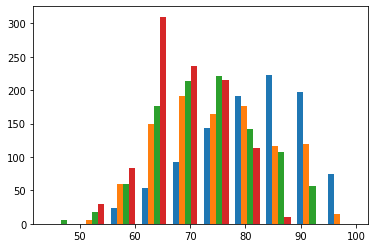

In [296]:
import matplotlib.pyplot as plt
plot_data = data.iloc[:,:-1].values
plt.hist(plot_data)

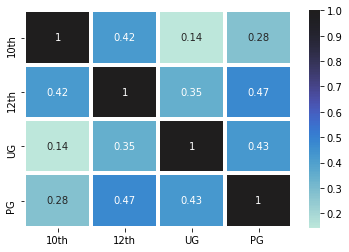

In [297]:
import seaborn as sns
sns.heatmap(data.corr(),linewidth=3.1,annot=True,center=1)

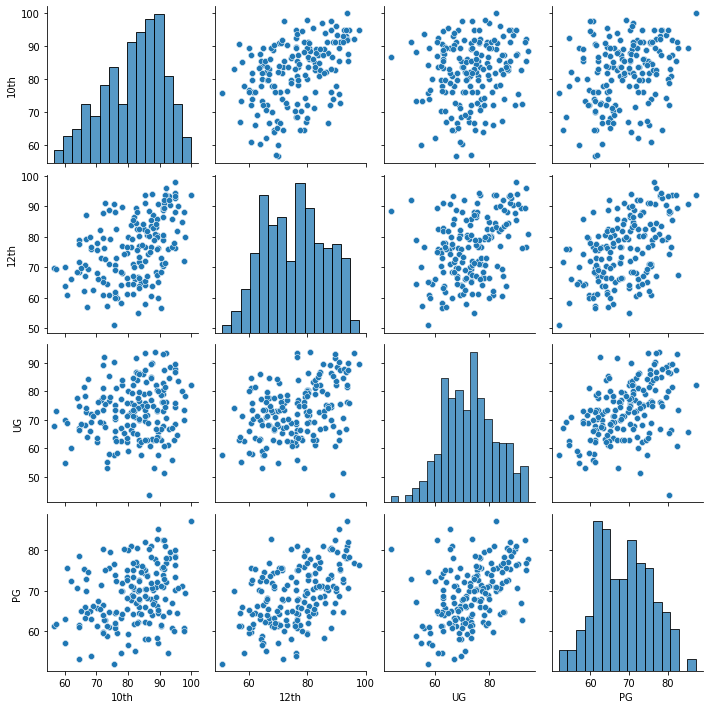

In [298]:
sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


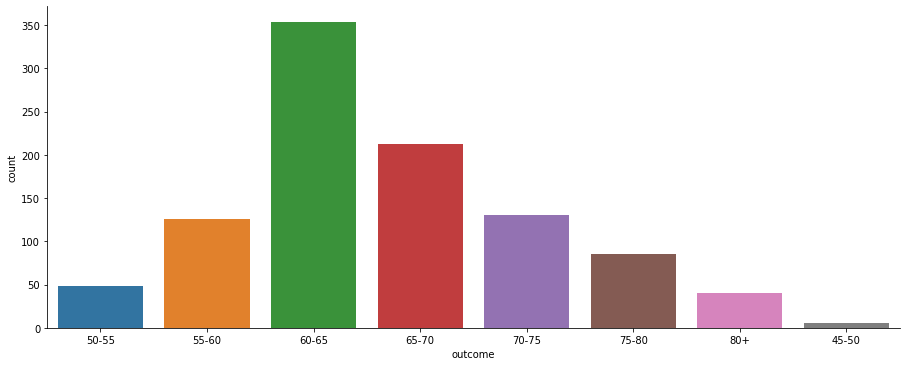

In [299]:
sns.factorplot(x='outcome', data=data , kind='count',aspect=2.5 )

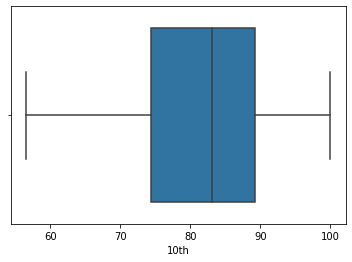

In [300]:
sns.boxplot(x="10th", data=data)

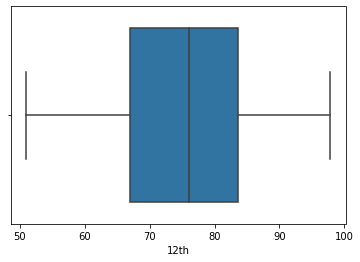

In [301]:
sns.boxplot(x="12th", data=data)

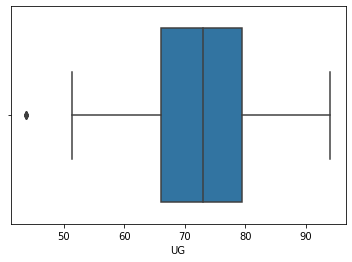

In [302]:
sns.boxplot(x="UG", data=data)

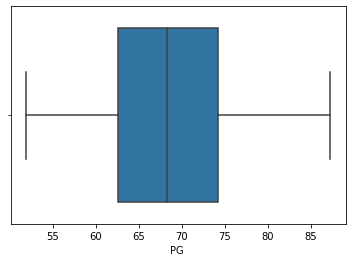

In [303]:
sns.boxplot(x="PG ", data=data)

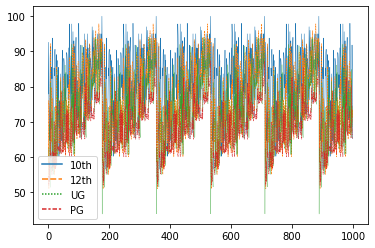

In [304]:
sns.lineplot(data=data, palette="tab10", linewidth=0.5)

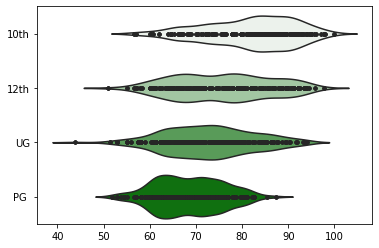

In [305]:
sns.violinplot(data=data,  palette="light:g", inner="points", orient="h")

In [306]:
# Getting the attributes and class labels seperate
X=data.iloc[:,:-1].values
y=data.iloc[:,4].values

In [307]:
# Spliting the dataset into train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [308]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [309]:
# creating classfier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [310]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [311]:
# Testing the classifier
y_pred = classifier.predict(X_test)

In [312]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[ 2  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0]
 [ 0  0  0 77  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 26  0  0]
 [ 0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  9]]


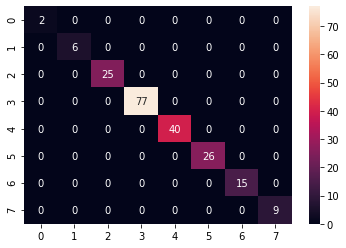

In [313]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

In [314]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

       45-50       1.00      1.00      1.00         2
       50-55       1.00      1.00      1.00         6
       55-60       1.00      1.00      1.00        25
       60-65       1.00      1.00      1.00        77
       65-70       1.00      1.00      1.00        40
       70-75       1.00      1.00      1.00        26
       75-80       1.00      1.00      1.00        15
         80+       1.00      1.00      1.00         9

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [315]:
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Accuracy: 1.0


Test with custom input

In [316]:
classifier.predict(scaler.transform([[63.99,78.76,65,60]]))

array(['60-65'], dtype=object)